[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ct-reconstruction/)

<img src='__docs/notebook_rules.png' />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib notebook

import imars3d
# print(f"Using imarsd version {imars3d.__version__}")

from __code.laminographyui import LaminographyUi
#from __code.roi_selection_ui import Interface

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

%matplotlib notebook

# Select input data 

## raw data

In [2]:
#o_imars3dui = LaminographyUi(working_dir=system.System.get_working_dir())
o_imars3dui = LaminographyUi(working_dir="/HFIR/CG1D/IPTS-23768")
o_imars3dui.select_raw()

raw folder selected: ['/HFIR/CG1D/IPTS-23768/raw/ct_scans/2024_01_22_laminography_test'] with 1162 files)


## ob 

In [3]:
o_imars3dui.select_ob()

ob folder selected: ['/HFIR/CG1D/IPTS-23768/raw/ob/2024_01_22_laminography_test'] with 5 files)


## dc 

In [4]:
o_imars3dui.select_dc()

dc folder selected: ['/HFIR/CG1D/IPTS-23768/raw/dc/2024_01_21_45s'] with 5 files)


# Load

ct:   0%|          | 0/1162 [00:00<?, ?it/s]

ob:   0%|          | 0/5 [00:00<?, ?it/s]

dc:   0%|          | 0/5 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


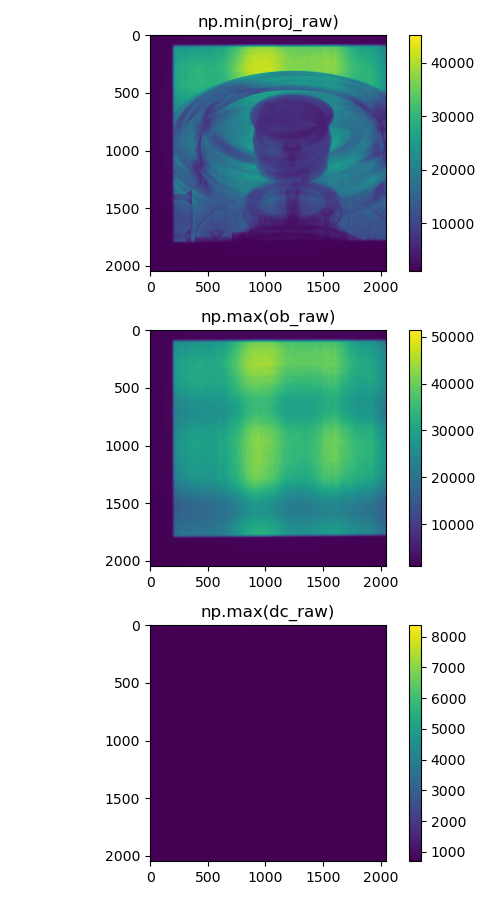

In [5]:
o_imars3dui.load_and_display_data()

# Crop

In [6]:
%matplotlib inline

### select crop region

In [7]:
o_imars3dui.crop_embedded()

interactive(children=(IntSlider(value=0, description='left', max=2047), IntSlider(value=2047, continuous_updat…

### perform cropping 

In [8]:
o_imars3dui.perform_embedded_cropping()

Running crop ...
cropping done!


# Gamma filtering  (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [9]:
o_imars3dui.gamma_filtering_options()

Checkbox(value=False, description='Gamma filtering')

In [10]:
o_imars3dui.gamma_filtering()

Gamma filtering skipped!


# Normalization (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Running normalization ...
normalization done in 9.83s


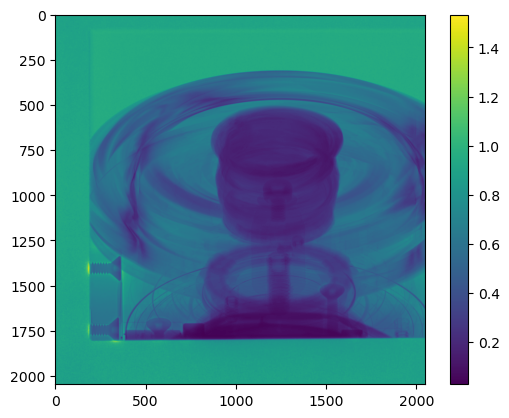

In [11]:
o_imars3dui.normalization_and_display()

# Beam fluctuation correction

### Select a region that does not contain the sample to improve the normalization

In [12]:
o_imars3dui.beam_fluctuation_correction_option()

Checkbox(value=False, description='Beam fluctuation correction')

### define beam fluctuation settings (if requested) 

In [13]:
o_imars3dui.define_beam_fluctuation_settings()

### perform beam fluctuation correction (if requested)

In [14]:
o_imars3dui.run_beam_fluctuation_correction()

# Transmission to attenuation

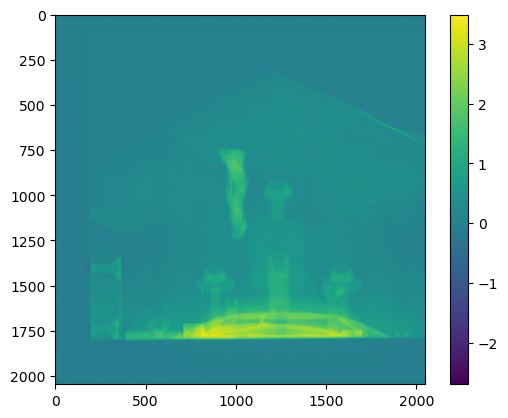

In [15]:
o_imars3dui.minus_log_and_display()

# Tilt calculation (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

The tilt will be calculated and tested on the data set, but only applied during the reconstruction phase!

## find 0 and 180 degrees files

In [16]:
o_imars3dui.find_0_180_degrees_files()

## calculate tilt 

In [17]:
o_imars3dui.calculate_tilt()

## Slices to use to test tilt calculation 

In [18]:
o_imars3dui.test_tilt_slices_selection()

interactive(children=(IntSlider(value=50, description='slice1', max=2046), IntSlider(value=1997, description='…

## testing tilt on selected algorithms (Zzz) 

In [19]:
o_imars3dui.testing_tilt_on_selected_algorithms()

IntProgress(value=0, description='Progress:', max=5)

INFO:imars3d.backend.diagnostics.tilt:Executing Filter: Tilt correction
INFO:imars3d.backend.diagnostics.tilt:3D array detected, applying tilt correction with tilt = 0.540 deg


Running direct minimization ... 

Applying tilt corr:   0%|          | 0/1162 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 6
INFO:imars3d.backend.diagnostics.rotation:Using all pairs of angles


Done!


Finding rotation center:   0%|          | 0/1163 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:FINISHED Executing Filter: Find Rotation Center


interactive(children=(ToggleButtons(description='Algorithm:', disabled=True, options=('direct minimization',),…

## Display data with tilt corrected 

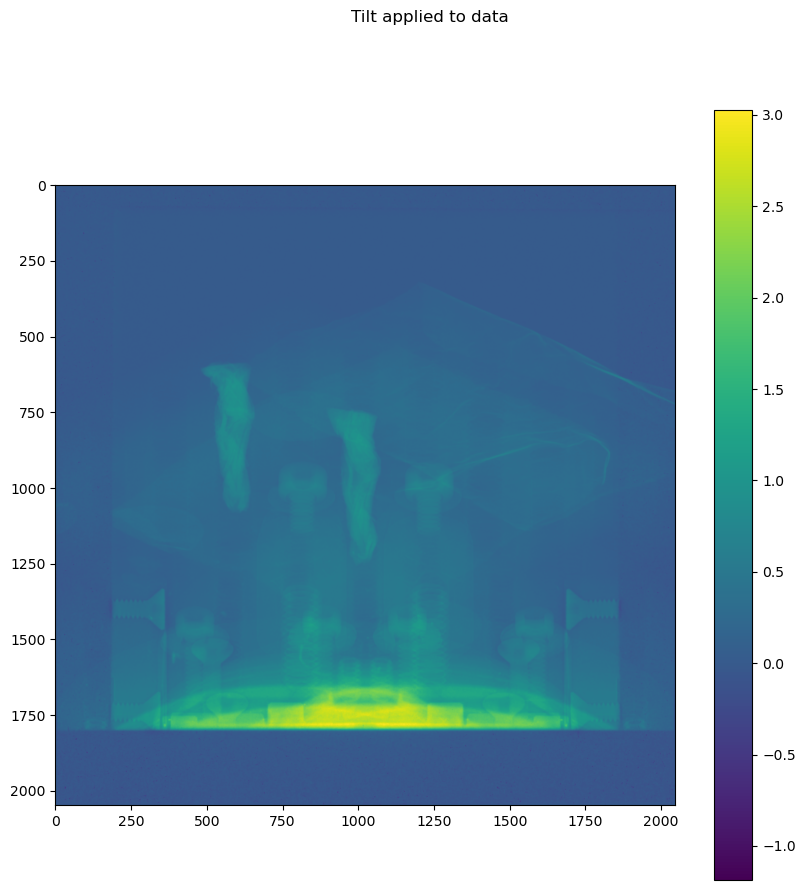

In [20]:
o_imars3dui.display_with_tilt()

# Filtering

* remove negative values

In [21]:
o_imars3dui.filter_options()

Checkbox(value=False, description='Remove negative values')

In [22]:
o_imars3dui.apply_filter_options()

 Skipped remove negative values!


# Display sinogram 

In [23]:
o_imars3dui.create_and_display_sinogram()

interactive(children=(IntSlider(value=0, description='index', max=2047), Output()), _dom_classes=('widget-inte…

# Ring removal 

## Select 

In [24]:
o_imars3dui.ring_removal_options()

In [25]:
o_imars3dui.apply_filter_options()

 Skipped remove negative values!


# Reconstruction 

### Set up range of slices to reconstruct 

In [26]:
o_imars3dui.select_range_of_slices()

interactive(children=(IntSlider(value=0, continuous_update=False, description='top', max=2047), IntSlider(valu…

### Set up paremeters 

In [27]:
o_imars3dui.laminography_settings()

### Run laminography reconstruction 

In [28]:
o_imars3dui.run_laminography()

INFO:imars3d.backend.morph.crop:Executing Filter: Crop
INFO:imars3d.backend.morph.crop:FINISHED Executing Filter: Crop


np.shape(self._proj_data)= (2047, 1162, 2047)
np.shape(self._weight_data)= (2047, 1162, 2047)
proj_params ={'type': 'par', 'dims': array([2047, 1162, 2047]), 'angles': [0.0, 0.0054105206811824215, 0.010821041362364843, 0.016231562043547264, 0.021642082724729686, 0.027052603405912107, 0.03246312408709453, 0.03787364476827695, 0.04328416544945937, 0.0486946861306418, 0.054105206811824215, 0.05951572749300664, 0.06492624817418906, 0.07033676885537149, 0.0757472895365539, 0.08115781021773633, 0.08656833089891874, 0.09197885158010116, 0.0973893722612836, 0.102799892942466, 0.10821041362364843, 0.11362093430483085, 0.11903145498601328, 0.1244419756671957, 0.12985249634837812, 0.13526301702956053, 0.14067353771074298, 0.14608405839192537, 0.1514945790731078, 0.15690509975429023, 0.16231562043547265, 0.16772614111665507, 0.1731366617978375, 0.17854718247901993, 0.18395770316020232, 0.18936822384138474, 0.1947787445225672, 0.2001892652037496, 0.205599785884932, 0.21101030656611444, 0.2164208272

Laminography reconstruction ran in 69696.03s


# Visualize reconstruction

In [29]:
o_imars3dui.visualize_reconstruction()

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=2046), Output()), _…

# Export


In [ ]:
o_imars3dui.export()